In [1]:
from sparse_sig import *
from data_loader import *
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
A, x0 = load_signal()

In [3]:
b = np.matmul(A, x0)

In [4]:
lam = 0.01*2*np.max(np.abs(np.matmul(A.T, b)))
t = 1.
epsilon = 0.1

In [5]:
xinit = np.zeros(256)
uinit = np.ones(256)
coords = np.concatenate((xinit, uinit))

In [6]:
i=0
while np.linalg.norm(grad_phi(A, b, lam, t, coords[:256], coords[256:])) > epsilon:
    i+=1
    print(i)
    coords_old = coords
    coords = newton_step(A, b, lam, t, coords_old)

1
2
3
4
5
6
7
8


In [7]:
min_en = minimum_energy(A, b).flatten()

/Users/joejohnson/Documents/convex-optimisation/sparse_sig.py:70: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  return np.linalg.lstsq(A, b)[0]


<IPython.core.display.Javascript object>


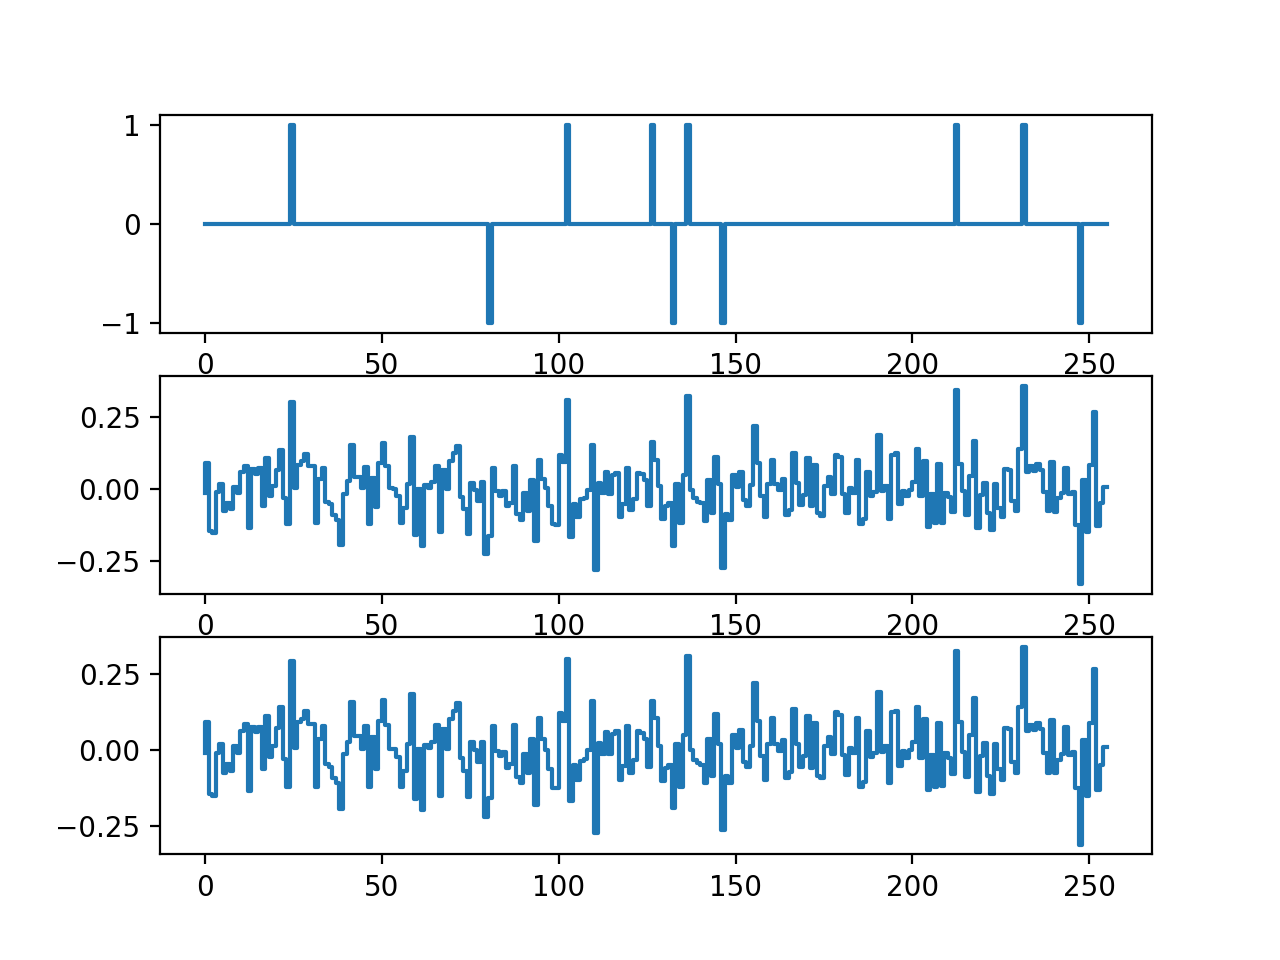

In [8]:
fig, [ax1, ax2, ax3] = plt.subplots(nrows=3)
ax1.step(np.arange(256), x0)
ax2.step(np.arange(256), coords[:256])
ax3.step(np.arange(256), min_en)